#  Importing libraries 

In [2]:
import pandas as pd 
import numpy as np 
import os 

In [3]:
for dirname, _, filenames in os.walk("C:/Users/dell/Downloads/Project/Project/Garbage_Classification"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/dell/Downloads/Project/Project/Garbage_Classification\one-indexed-files-notrash_test.txt
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\one-indexed-files-notrash_train.txt
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\one-indexed-files-notrash_val.txt
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\one-indexed-files.txt
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\zero-indexed-files.txt
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\Garbage classification\cardboard\cardboard1.jpg
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\Garbage classification\cardboard\cardboard10.jpg
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\Garbage classification\cardboard\cardboard100.jpg
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\Garbage classification\cardboard\cardboard101.jpg
C:/Users/dell/Downloads/Project/Project/Garbage_Classification\Garbage classification\

In [4]:
#!pip install imutils 

In [1]:
# reading and processing data 
import cv2
import urllib 
import itertools 
import seaborn as sns 
import os, random, glob
import matplotlib.pyplot as plt
from imutils import paths
from sklearn.utils import shuffle
from urllib.request import urlopen 

# ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

# model evaluation 
from sklearn.metrics import confusion_matrix, classification_report 

# modeling 

import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

#  Reading the dataset 

In [7]:
dir_path = "C:/Users/dell/Downloads/Project/Project/Garbage_Classification"

In [4]:
target_size = (224, 224)
waste_labels = {'cardboard':0,'glass':1, 'metal':2, 'paper':3, 'plastic':4, 'trash':5}

In [8]:
def load_dataset(path):
    """ 
  It reads the images in the directory and creates their labels.

  Parameters:

  path: Refers to the directory where the images are located.
  Return:
   x: It stores the matrix information of the images.
  labels: A list that holds the class information of each image.
  """
    x = []
    labels = []
    # It lists and sorts the images in the specified path
    image_paths = sorted(list(paths.list_images(path)))
   
    for image_path in image_paths :
        # The images in the specified path are read using the OpenCV library
        img = cv2.imread(image_path)
        # resize the read image 
        img = cv2.resize(img, target_size)
        # the resized images are added to the x list
        x.append(img)
         # When each path is split by '/', the second-to-last element of the resulting list represents the label
        label = image_path.split(os.path.sep)[-2]
        
        # The label is created by retrieving the corresponding value for the given key from the `waste_labels`

        # dictionary, which contains the numerical representations of the captured labels
        labels.append(waste_labels[label])
        # the dataset is shuffled randomly
    x, labels = shuffle(x, labels, random_state = 42)
    print(f'X size : {np.array(x).shape}')
    print(f'Number of label classes {np.unique(labels)}, Number of observation in the dataset : {len(labels)}')
    
    return np.array(x), np.array(labels) 


In [9]:
x, labels = load_dataset(dir_path)

X size : (4651, 224, 224, 3)
Number of label classes [0 1 2 3 4 5], Number of observation in the dataset : 4651


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test_, y_train, y_test_ = train_test_split(
    x, labels, test_size=0.3, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
   X_test_, y_test_, test_size=0.5, random_state=42
)

#print(f"Train set size: {len(X_train)}")
#print(f"Test set size: {len(X_test)}")


In [9]:
#X_train,y_train = load_dataset(dir_path_train)
#X_test,y_test = load_dataset(dir_path_test)
#X_val,y_val = load_dataset(dir_path_val)

In [10]:
input_shape = (np.array(X_train[0]).shape[1], np.array(X_train[0]).shape[0], 3)
print(input_shape)

(224, 224, 3)


In [11]:
np.array(list(list(waste_labels.keys())))

array(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'],
      dtype='<U9')

# Sample from dataset

In [12]:
def visualize_img(image_batch, label_batch,n):
    """  Parameters:



  image_batch: Storing the matrix information of the images



  label_batch: A list that stores the class information of the image

    """
    plt.figure(figsize=(15,65))
    j = 0
    for n in range(100+n):
        ax = plt.subplot(20,5,j+1)
        j +=1
        plt.imshow(image_batch[n])
        plt.title(np.array(list(waste_labels.keys())) [to_categorical(label_batch, num_classes=6)[n]==1][0].title())

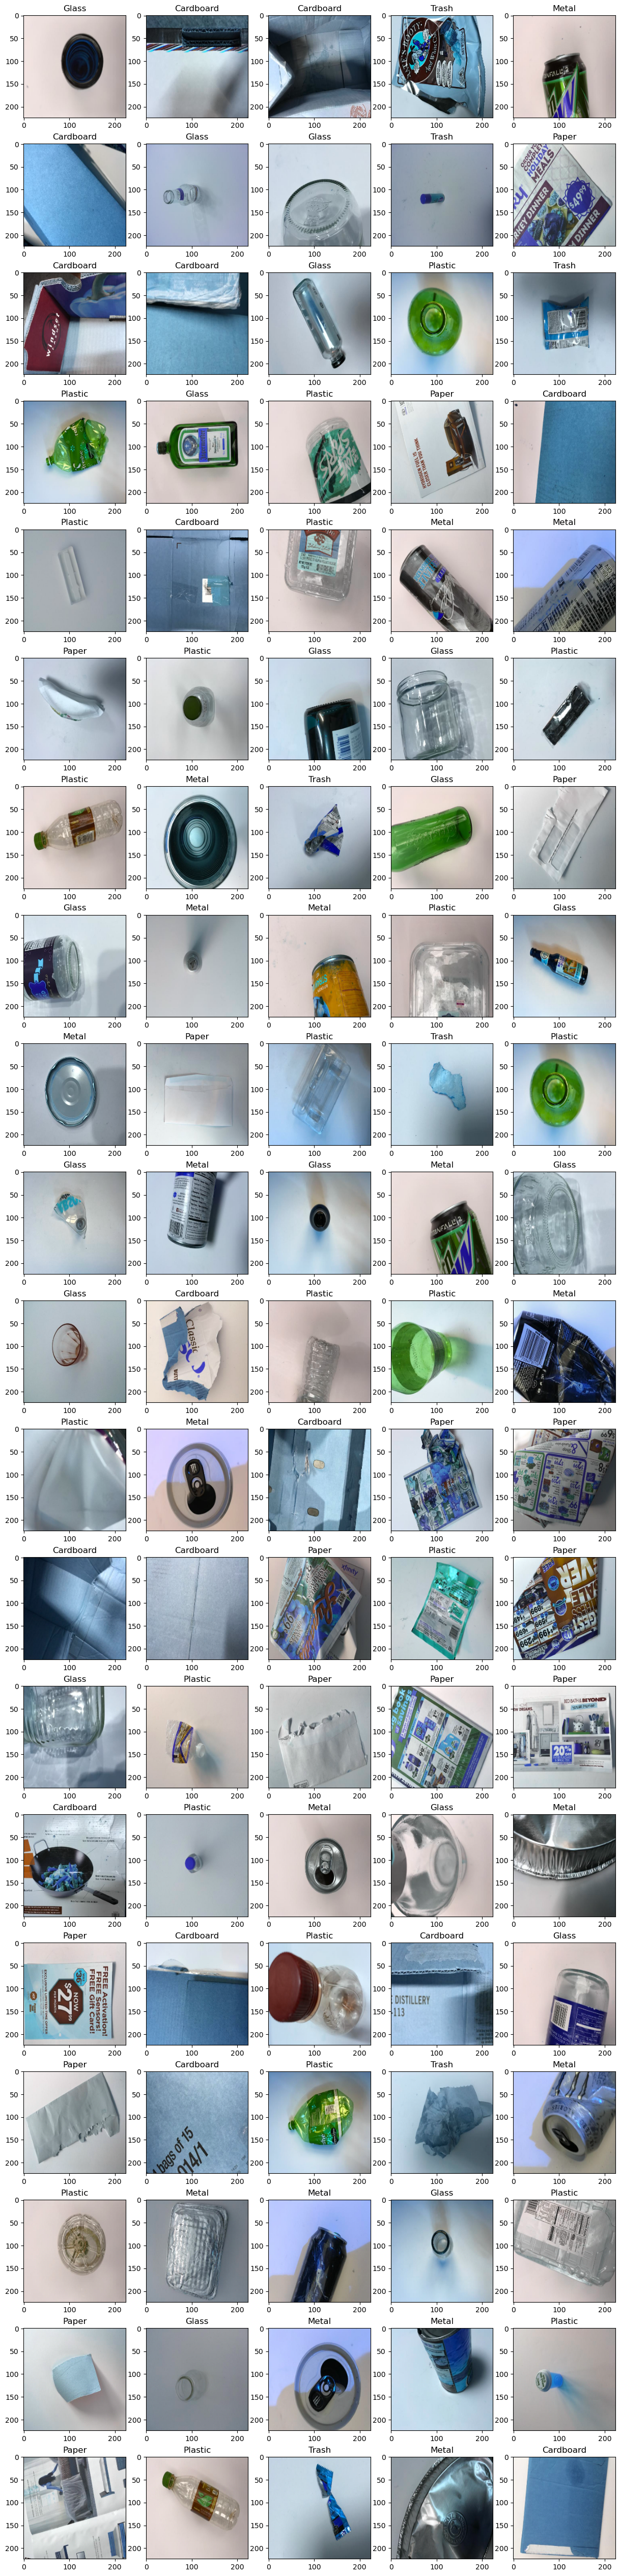

In [13]:
visualize_img(X_train, y_train,0)

# Data augmentation 
- this step means generate more data using the exsting data 

In [14]:
X_train.shape

(3255, 224, 224, 3)

# Modeling
- Create a CNN model 

In [14]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    #pooling = None,
    #classes,
    classifier_activation=None
)


In [15]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [16]:
x_train = base_model.predict(X_train)
x_test = base_model.predict(X_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step


In [17]:
x_val = base_model.predict(X_val)

22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step


In [20]:
print(x_train.shape,x_test.shape)

(3255, 1000) (698, 1000)


# Testing

In [18]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#from sklearn.decomposition import PCA

In [19]:
x_train_flat = X_train.reshape(X_train.shape[0], -1)
x_test_flat = X_test.reshape(X_test.shape[0], -1)
x_val_flat = X_val.reshape(X_val.shape[0], -1)

x_train_flat.shape,x_test_flat.shape,x_val_flat.shape

((3255, 150528), (698, 150528), (698, 150528))

In [20]:
clf = SVC(kernel='rbf', C=1)

AttributeError: 'SVC' object has no attribute 'summary'

In [22]:
clf.fit(x_train_flat, y_train)

MemoryError: Unable to allocate 3.65 GiB for an array with shape (3255, 150528) and data type float64

In [56]:
y_pred = clf.predict(x_val_flat)

In [57]:
accuracy = accuracy_score(y_val, y_pred)

In [58]:
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.79


In [59]:
y_pred_test = clf.predict(x_test_flat)

In [60]:
accuracy = accuracy_score(y_test, y_pred_test)

In [61]:
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.89


In [12]:
from joblib import dump, load

# Save the model
#dump(clf, 'svm.joblib')

# Load the model
svm = load('svm.joblib')


# Evaluation 

In [69]:
img = cv2.imread("C:/Users/dell/Pattern-Recognition - Copy/Pattern-Recognition - Copy/imagesTest/plastic.jpg")

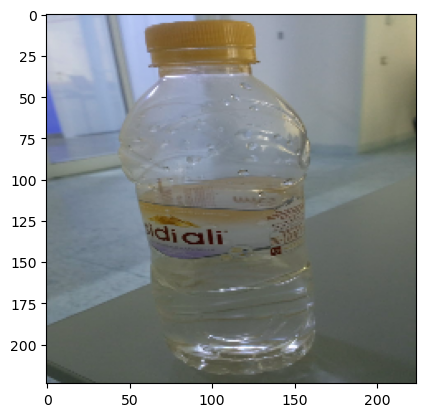

In [70]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
img_x = []
#m = load_model("Res_Model_1.keras")
#img = x[1815]
#img = cv2.imread("C:/Users/dell/Pattern-Recognition - Copy/Pattern-Recognition - Copy/imagesTest/news.jpg")
img = cv2.resize(img, (224,224)) / 255.0
img_x.append(img)
img_x = np.array(img_x)
img_x.shape
plt.imshow(img)

In [71]:
s  = base_model.predict(img_x)

y_pred = svm.predict(s.reshape(s.shape[0], -1))
print(y_pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
5


# Deployment

In [72]:
predicted_class_index = y_pred[0]

predicted_label = next((key for key, value in waste_labels.items() if value == predicted_class_index), None)

print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_label}")

Predicted class index: 5
Predicted class name: trash
